In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
from scipy.optimize import curve_fit

In [186]:
%matplotlib inline

In [178]:
df = pd.read_csv("scope_42.csv",skiprows=range(1, 2))

df

,x-axis,1
0,-1.000000e-06,0.870516
1,-9.990000e-07,-0.702706
2,-9.980000e-07,-0.133668
3,-9.970000e-07,0.820306
4,-9.960000e-07,-0.853334
...,...,...
1995,9.950000e-07,0.770097
1996,9.960000e-07,-0.886806
1997,9.970000e-07,0.217796
1998,9.980000e-07,0.602733


In [180]:
plt.plot(df.iloc[:,0]/1e-9,df.iloc[:,1])
plt.ylim(-1,1)
plt.show()

<IPython.core.display.Javascript object>

In [181]:
time = df.iloc[:,0];
v = df.iloc[:,1];
dt = time[1]-time[0]
fs = 1/dt
fs

1000000000.0001366

In [182]:
df

,x-axis,1
0,-1.000000e-06,0.870516
1,-9.990000e-07,-0.702706
2,-9.980000e-07,-0.133668
3,-9.970000e-07,0.820306
4,-9.960000e-07,-0.853334
...,...,...
1995,9.950000e-07,0.770097
1996,9.960000e-07,-0.886806
1997,9.970000e-07,0.217796
1998,9.980000e-07,0.602733


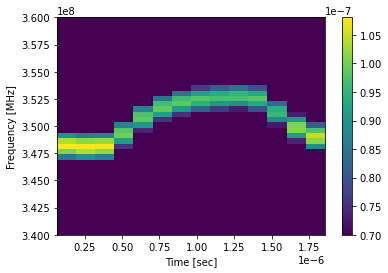

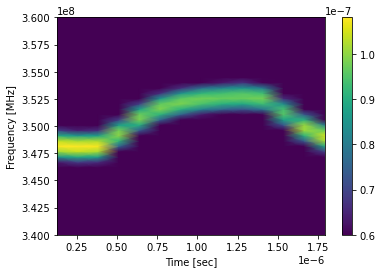

In [187]:
f, t, Sxx = signal.spectrogram(v, fs,window='boxcar',nperseg=256, noverlap=128, nfft=2048,detrend='constant')
plt.pcolormesh(t, f, Sxx, shading='auto',vmin=0.7e-7)
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [sec]')
plt.ylim(340e6,360e6)
plt.colorbar()
plt.show()
plt.pcolormesh(t, f, Sxx, shading='gouraud',vmin=0.6e-7)
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [sec]')
plt.ylim(340e6,360e6)
plt.colorbar()
plt.show()

In [ ]:
f, t, Sxx = signal.spectrogram(v, fs,window='boxcar',nperseg=256, noverlap=128, nfft=2048,detrend='constant')

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(x, fs=fs, window='hann', nperseg=512, noverlap=256, nfft=2048, detrend='constant')

# Define start and end frequencies
start_frequency = 50  # Adjust to your desired start frequency
end_frequency = 150  # Adjust to your desired end frequency

# Extract the corresponding rows in the spectrogram for the specified frequency range
start_index = np.argmin(np.abs(f - start_frequency))
end_index = np.argmin(np.abs(f - end_frequency))
Sxx_range = Sxx[start_index:end_index, :]

# Find the time point of maximum amplitude for each frequency bin
times_max_amplitude = t[np.argmax(Sxx_range, axis=1)]

# Find the peak amplitude for each frequency bin
peak_amplitudes = np.max(Sxx_range, axis=1)

# Define the threshold values (10% and 90% of the peak for each frequency bin)
threshold_10 = 0.10 * peak_amplitudes
threshold_90 = 0.90 * peak_amplitudes

# Find the time points where the signal crosses the 10% and 90% thresholds for each frequency bin
cross_threshold_10 = times_max_amplitude[np.argmax(Sxx_range >= threshold_10[:, np.newaxis], axis=1)]
cross_threshold_90 = times_max_amplitude[np.argmax(Sxx_range >= threshold_90[:, np.newaxis], axis=1)]

# Compute the rise time for each frequency bin
rise_time = cross_threshold_90 - cross_threshold_10

print(f"10%-90% Rise time: {rise_time:.2f} seconds")

In [184]:
import matplotlib

matplotlib.use('nbagg')

f, t, Sxx = signal.spectrogram(y, fs,nperseg=256, noverlap=128, nfft=2048,detrend='constant')
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [sec]')
plt.ylim(340e6,360e6)
plt.colorbar()
# plt.show()

AttributeError: 'list' object has no attribute 'shape'

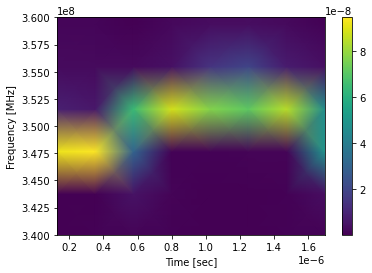

In [91]:
f, t, Sxx = signal.spectrogram(y, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [sec]')
plt.ylim(340e6,360e6)
plt.colorbar()
plt.show()

In [ ]:
# Define the model function for the rise and fall behavior
def signal_model(t, A, tr, tf, offset):
    return offset + A * (1 - np.exp(-t / tr)) * np.exp(-t / tf)

# Generate a synthetic dataset with noise
t = np.linspace(0, 10, 100)
A_true = 2.0
tr_true = 1.0
tf_true = 3.0
offset_true = 1.0
signal_true = signal_model(t, A_true, tr_true, tf_true, offset_true)
noise = np.random.normal(0, 0.1, t.shape)
signal_noisy = signal_true + noise

# Fit the data to the model
initial_guess = [1.0, 1.0, 1.0, 1.0]  # Initial guess for parameters
params, covariance = curve_fit(signal_model, t, signal_noisy, p0=initial_guess)

# Extract the fitted parameters
A_fit, tr_fit, tf_fit, offset_fit = params

# Plot the original data and the fitted curve
plt.scatter(t, signal_noisy, label="Noisy Data", color="b")
plt.plot(t, signal_model(t, A_fit, tr_fit, tf_fit, offset_fit), label="Fitted Curve", color="r")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()
plt.show()

# Calculate rise and fall times
rise_time = tr_fit
fall_time = tf_fit

print("Fitted Rise Time:", rise_time)
print("Fitted Fall Time:", fall_time)

In [155]:
# Define the exponential model function
def exponential(x, A, tau):
    return A * (1 - np.exp(-x / tau))

# Fit the model to the data
params, covariance = curve_fit(exponential, time, f, p0=(1.0, 0.2))

# Extract rise and fall times from the fitted parameters
rise_time = params[1]
fall_time = params[1]

# Plot the data and the fitted curve
plt.plot(time, data, 'o', label='Data')
plt.plot(time, exponential(time, *params), label='Fitted Curve')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

print(f"Rise Time: {rise_time:.4f}")
print(f"Fall Time: {fall_time:.4f}")


ValueError: operands could not be broadcast together with shapes (2000,) (1025,) 

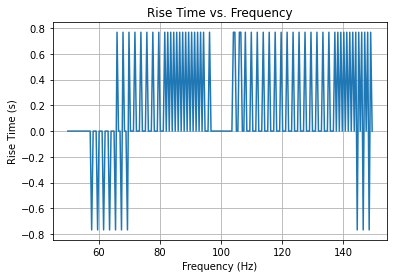